# 🔍 Unveiling the Machine: AI vs Human Content Detection (2026)

## Introduction
With the rapid advancement of Large Language Models (LLMs), distinguishing between human-written and AI-generated text has become a critical challenge. The **AI vs Human Content Detection Dataset 2026** provides a robust benchmark for this task, featuring multilingual samples, various domains, and mixed "post-edited" content.

## Objective
In this notebook, we will perform a comprehensive **Exploratory Data Analysis (EDA)** to understand:
* The balance of the dataset (Human vs. AI vs. Edited).
* The distribution of languages and content domains.
* The differences in text length (word count) between humans and AI.
* Visual differences in vocabulary using Word Clouds.

Let's dive in! 🚀

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Configuration for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visual aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Libraries Loaded Successfully")

✅ Libraries Loaded Successfully


## 1. Data Loading and First Look
Let's load the dataset and examine its structure, columns, and data types.

In [2]:
# Load the dataset
# Note: Ensure the file path matches the Kaggle input directory
file_path = '/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset Loaded. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ File not found. Please check the directory path.")

# Display the first few rows
display(df.head())

# General Information
print("-" * 30)
print("Dataset Information:")
print("-" * 30)
print(df.info())

# Check for missing values
print("-" * 30)
print("Missing Values:")
print("-" * 30)
print(df.isnull().sum())

✅ Dataset Loaded. Shape: (686, 11)


,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programación en Python es fácil . Pri...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnología en el aprend...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tú eres fuerte, capaz y única. N...",ai,llama-3.1-8b-instant,Escribe una publicación inspiradora para redes...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0


------------------------------
Dataset Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               686 non-null    object
 1   text             686 non-null    object
 2   human_or_ai      686 non-null    object
 3   source_model     686 non-null    object
 4   prompt           505 non-null    object
 5   domain           686 non-null    object
 6   language         686 non-null    object
 7   edit_level       686 non-null    object
 8   word_count       686 non-null    int64 
 9   generation_date  686 non-null    object
 10  version          686 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.1+ KB
None
------------------------------
Missing Values:
------------------------------
id                   0
text                 0
human_or_ai          0
source_model         0


## 2. Target Distribution
Our main goal is classification. Is the dataset balanced between Human, AI, and Post-Edited content? Let's visualize the target variable `human_or_ai`.

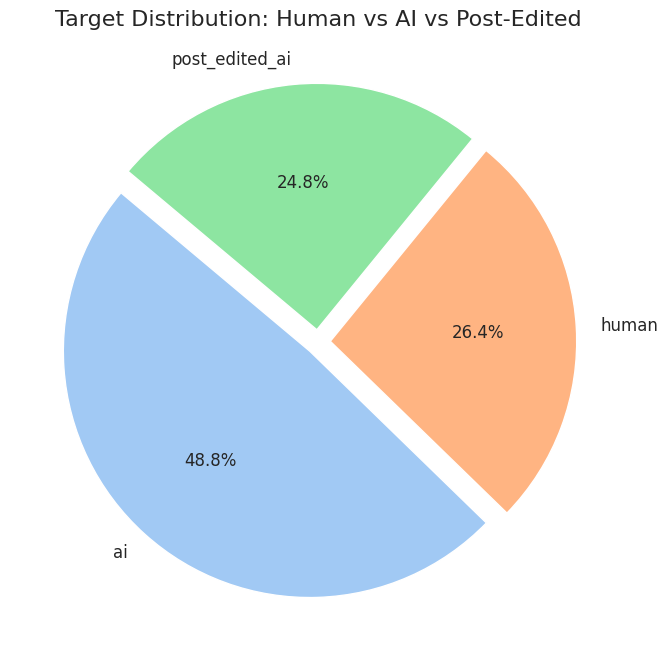

In [3]:
# Count the target variable
target_counts = df['human_or_ai'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'), explode=[0.05]*len(target_counts))
plt.title('Target Distribution: Human vs AI vs Post-Edited', fontsize=16)
plt.show()

## 3. Categorical Insights: Language, Domain, and Models
This dataset is rich in metadata. We will visualize:
1.  **Language:** Which languages are represented?
2.  **Domain:** What topics are covered (e.g., Education, Marketing)?
3.  **Source Model:** Which LLMs generated the AI content?
4.  **Edit Level:** How heavily was the content edited?

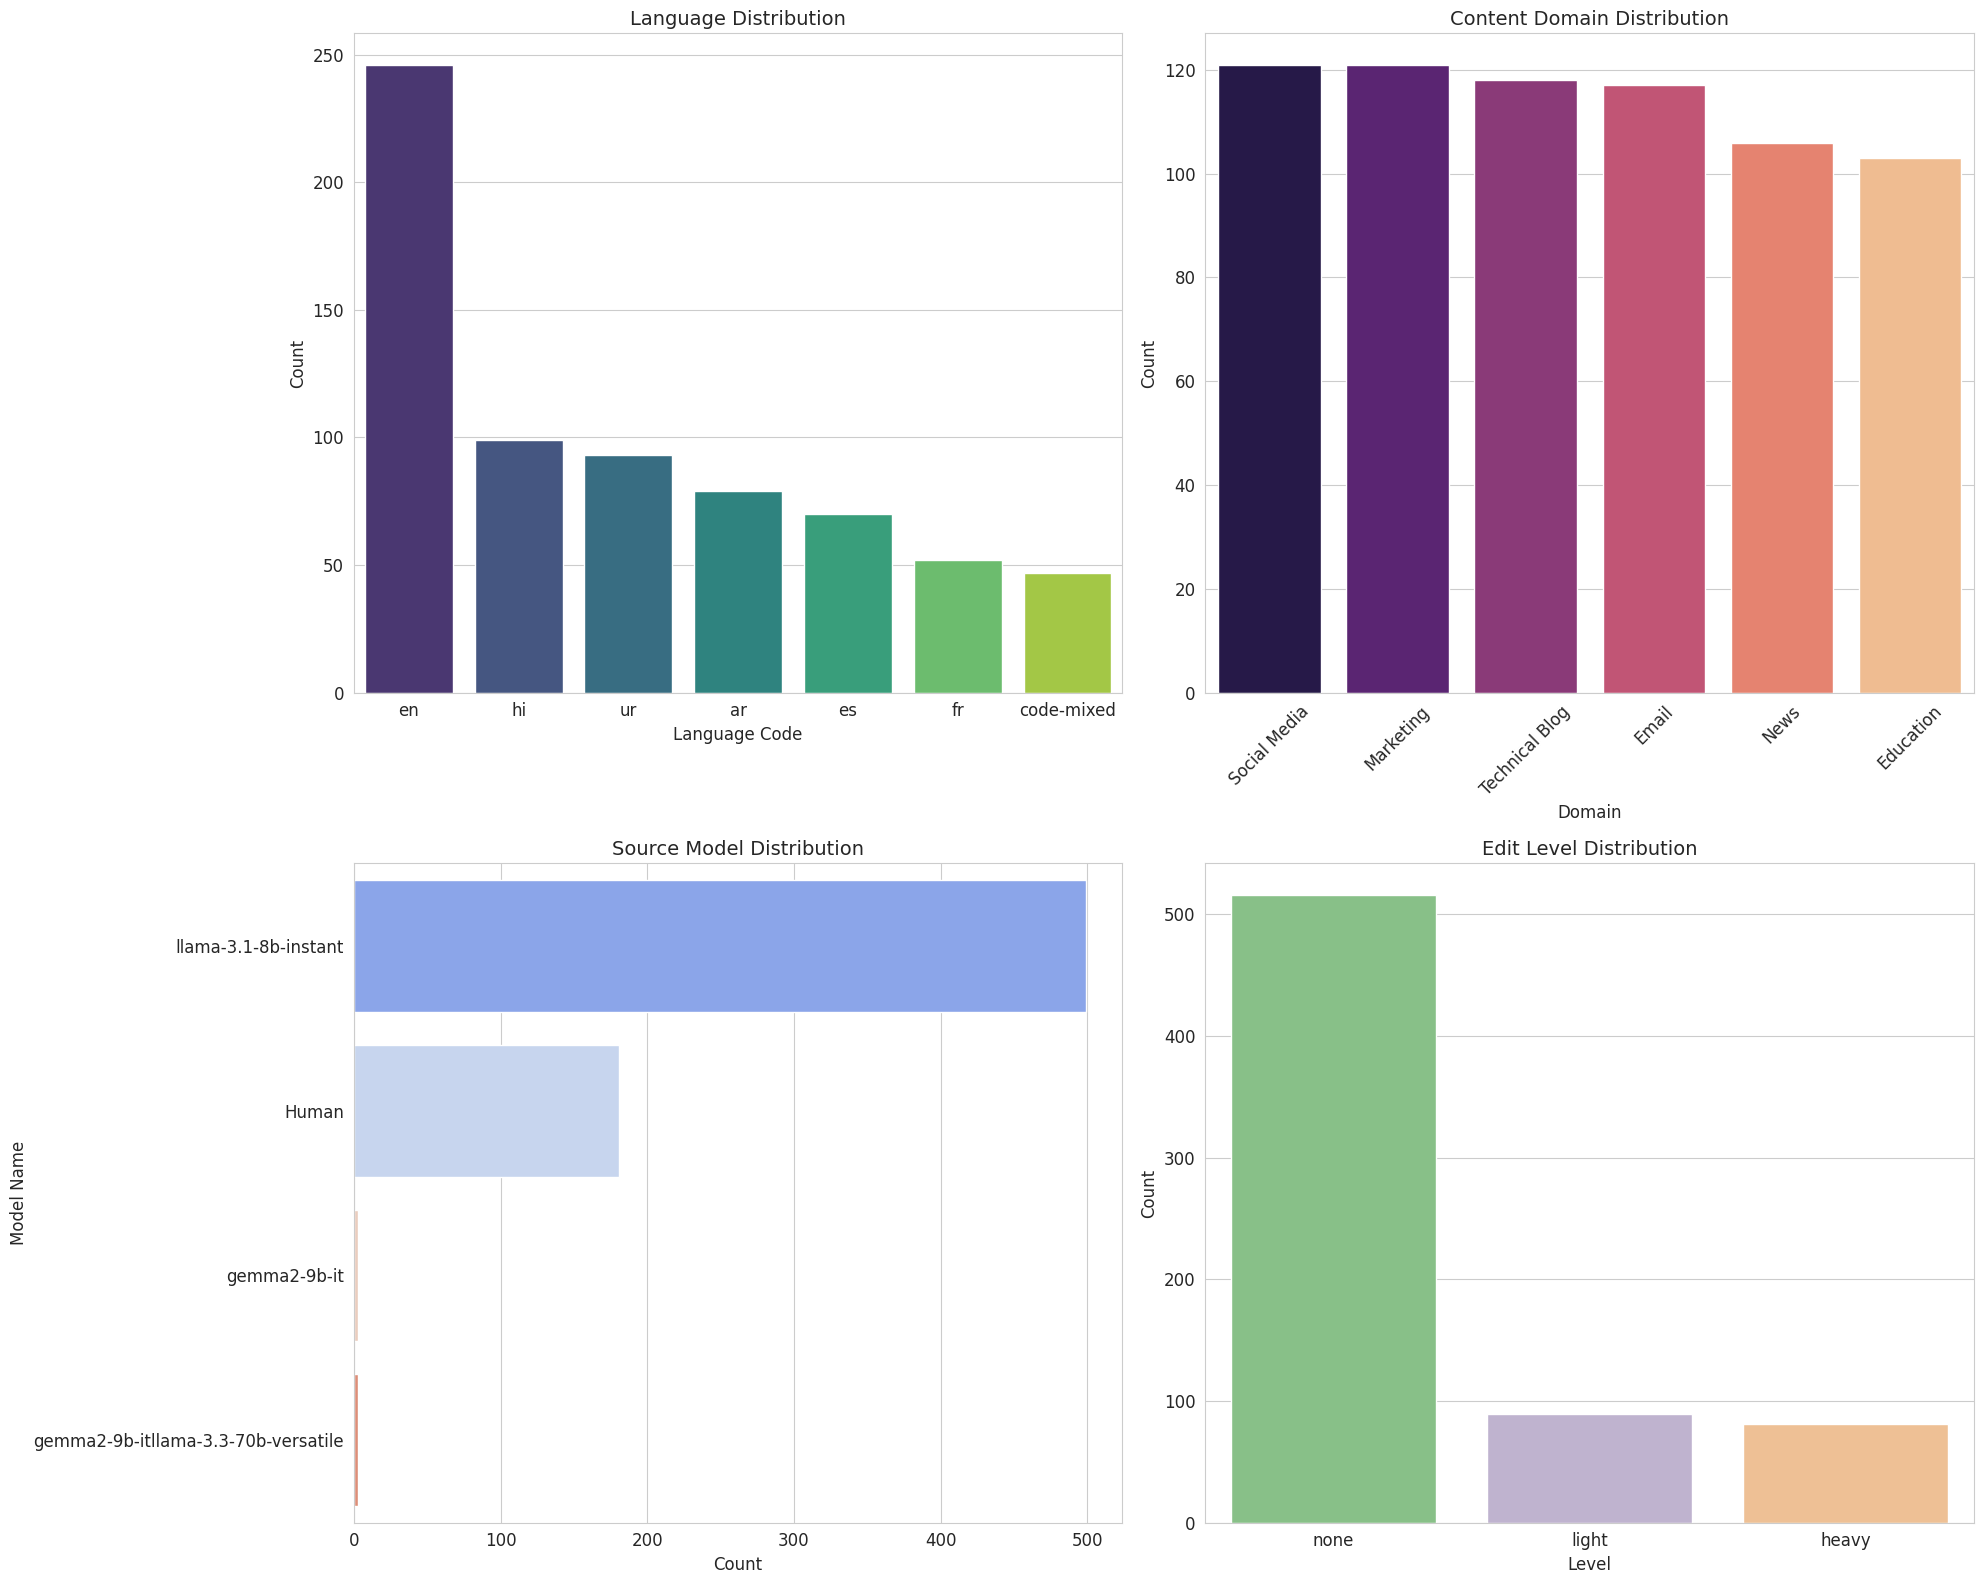

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Language Distribution
sns.countplot(data=df, x='language', ax=axes[0, 0], palette='viridis', order=df['language'].value_counts().index)
axes[0, 0].set_title('Language Distribution', fontsize=14)
axes[0, 0].set_xlabel('Language Code')
axes[0, 0].set_ylabel('Count')

# 2. Domain Distribution
sns.countplot(data=df, x='domain', ax=axes[0, 1], palette='magma', order=df['domain'].value_counts().index)
axes[0, 1].set_title('Content Domain Distribution', fontsize=14)
axes[0, 1].set_xlabel('Domain')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Source Model Distribution
sns.countplot(data=df, y='source_model', ax=axes[1, 0], palette='coolwarm', order=df['source_model'].value_counts().index)
axes[1, 0].set_title('Source Model Distribution', fontsize=14)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Model Name')

# 4. Edit Level Distribution
sns.countplot(data=df, x='edit_level', ax=axes[1, 1], palette='Accent', order=df['edit_level'].value_counts().index)
axes[1, 1].set_title('Edit Level Distribution', fontsize=14)
axes[1, 1].set_xlabel('Level')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 4. Text Length Analysis
Do AI models tend to be more verbose than humans? Let's analyze the `word_count` feature.

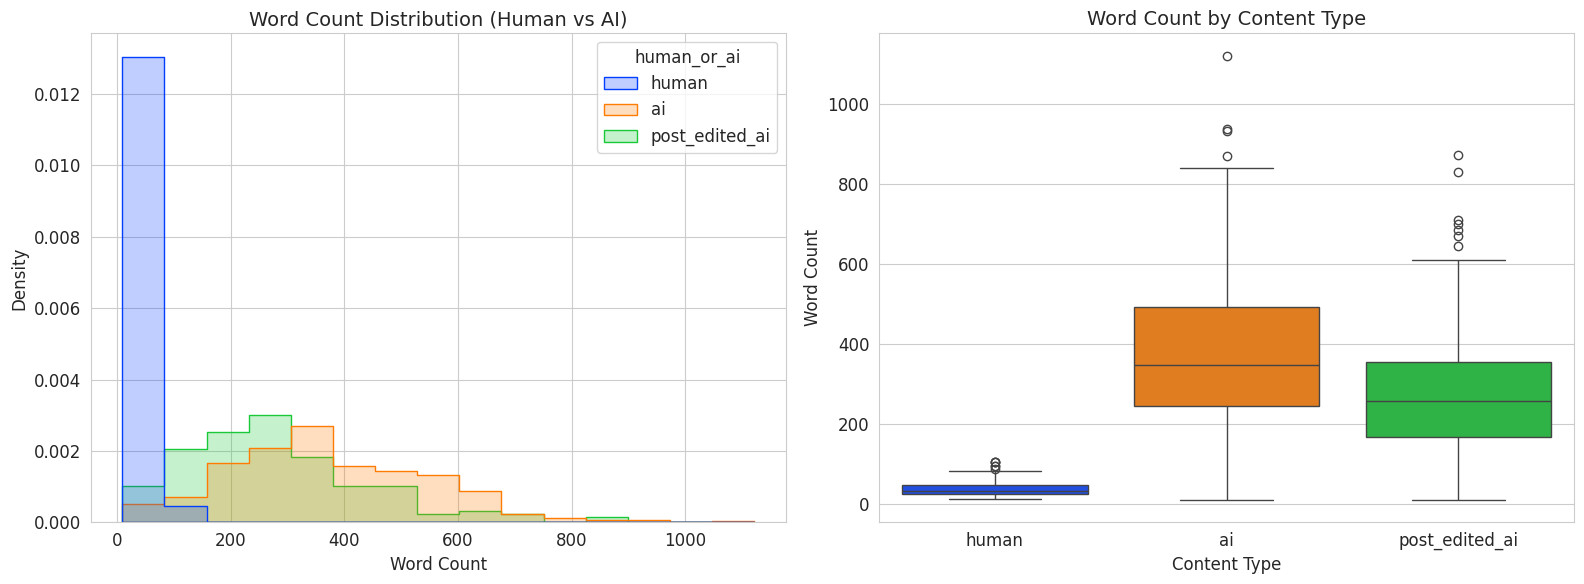

In [5]:
plt.figure(figsize=(16, 6))

# Histogram (Distribution)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='word_count', hue='human_or_ai', element="step", stat="density", common_norm=False, palette='bright')
plt.title('Word Count Distribution (Human vs AI)', fontsize=14)
plt.xlabel('Word Count')

# Boxplot (Outliers and Median)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='human_or_ai', y='word_count', palette='bright')
plt.title('Word Count by Content Type', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

## 5. Domain vs. Content Type
Let's see the breakdown of AI vs. Human content across different domains. Are certain domains more prone to AI generation in this dataset?

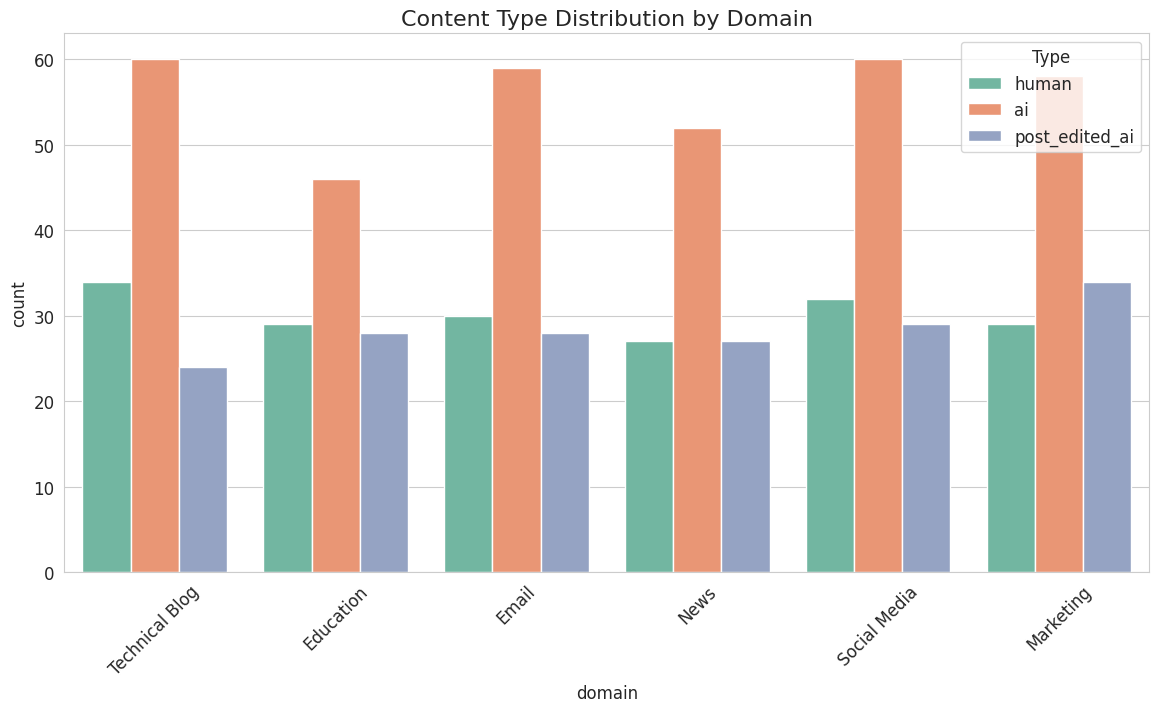

In [6]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='domain', hue='human_or_ai', palette='Set2')
plt.title('Content Type Distribution by Domain', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

## 6. Word Cloud Analysis
Finally, let's visualize the most frequent words used by Humans versus Artificial Intelligence. This can reveal stylistic differences in vocabulary.

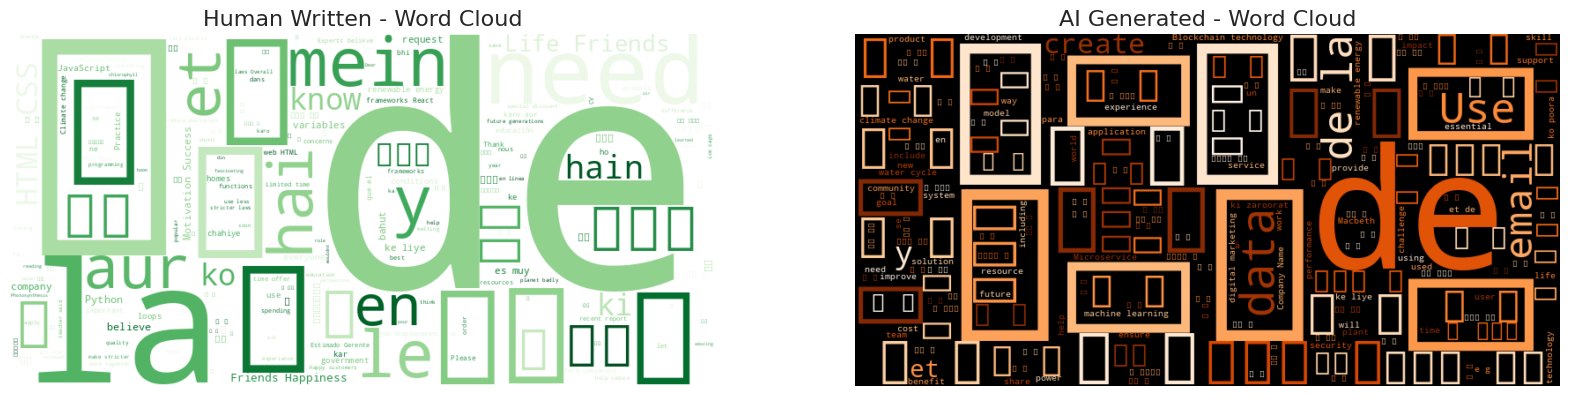

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Human Text WordCloud
human_text = " ".join(df[df['human_or_ai'] == 'human']['text'].astype(str))
wc_human = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(human_text)
axes[0].imshow(wc_human, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Human Written - Word Cloud', fontsize=16)

# AI Text WordCloud
ai_text = " ".join(df[df['human_or_ai'] == 'ai']['text'].astype(str))
wc_ai = WordCloud(width=800, height=400, background_color='black', colormap='Oranges').generate(ai_text)
axes[1].imshow(wc_ai, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('AI Generated - Word Cloud', fontsize=16)

plt.show()

## Conclusion
In this notebook, we explored the dataset structure and visualized key relationships.
* **Target:** We observed the class balance.
* **Metadata:** We analyzed the distribution of domains and source models.
* **Length:** We checked if word count is a distinguishing feature.
* **Vocabulary:** We visualized the common terms used by Humans vs AI.

**Next Steps:**
* Text Preprocessing (Tokenization, Stopword removal).
* Feature Extraction (TF-IDF, Embeddings).
* Building Classification Models (Logistic Regression, BERT, etc.).

If you found this notebook helpful, please **Upvote**! 👍